In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Database connections

In [2]:
from pymongo import MongoClient
client = MongoClient()

In [3]:
client = MongoClient('localhost', 27017)

In [4]:
marsdb = client.marsdb
weathercol = marsdb.weather

### Data Imports

In [10]:
import json
import requests

url = "https://pudding.cool/2017/12/mars-data/marsWeather.json"
resp = requests.get(url=url)
data = resp.json()

weathercol.insert_many(data)

In [11]:
df = pd.DataFrame(list(weathercol.find()))

In [12]:
df.head()

,_id,id,terrestrial_date,sol,ls,season,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,64106febb1fe9a1b2098cd51,3476,2022-11-25,3663,344,Month 12,-72.0,-44.0,817.0,None,Sunny
1,64106febb1fe9a1b2098cd52,3474,2022-11-24,3662,343,Month 12,-72.0,-9.0,800.0,None,Sunny
2,64106febb1fe9a1b2098cd53,3478,2022-11-23,3661,342,Month 12,-73.0,-8.0,797.0,None,Sunny
3,64106febb1fe9a1b2098cd54,3477,2022-11-22,3660,342,Month 12,-72.0,-10.0,798.0,None,Sunny
4,64106febb1fe9a1b2098cd55,3479,2022-11-21,3659,341,Month 12,-72.0,-12.0,798.0,None,Sunny


In [17]:
df.columns

Index(['_id', 'id', 'terrestrial_date', 'sol', 'ls', 'season', 'min_temp',
       'max_temp', 'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [13]:
df.describe()

,sol,ls,min_temp,max_temp,pressure
count,3036.000000,3036.000000,3029.000000,3029.000000,3030.000000
mean,2067.530632,171.124506,-74.660944,-13.065368,822.953135
std,915.008696,102.131428,5.576619,10.635784,56.240010
min,501.000000,0.000000,-100.000000,-67.000000,702.000000
25%,1271.750000,85.000000,-79.000000,-23.000000,779.000000
50%,2043.500000,161.000000,-74.000000,-12.000000,836.500000
75%,2862.250000,259.000000,-70.000000,-4.000000,868.000000
max,3663.000000,359.000000,-52.000000,11.000000,925.000000


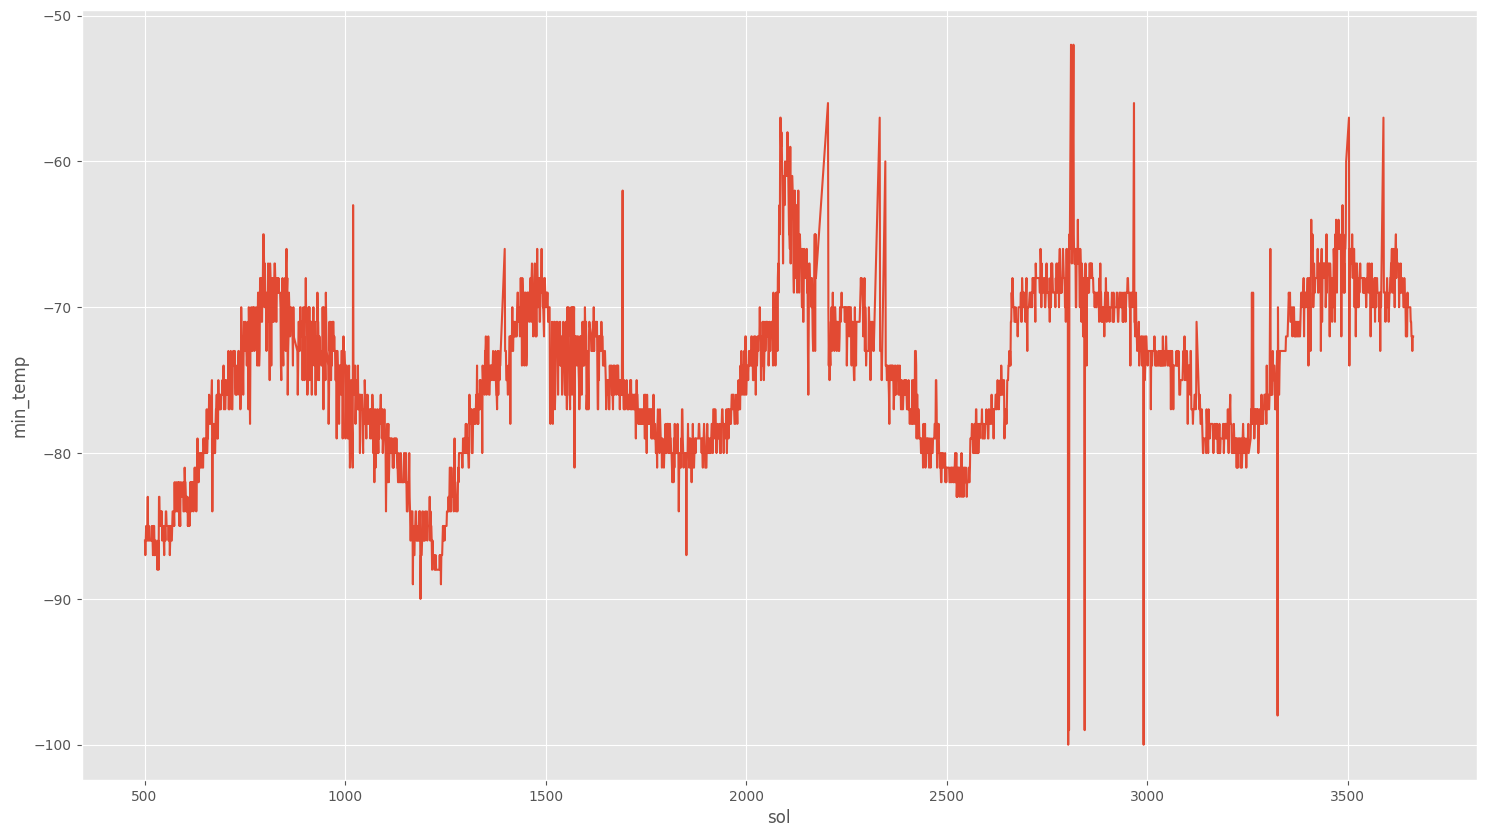

In [14]:
plt.rcParams["figure.figsize"] = (18, 10)
sns.lineplot(data=df, x='sol', y='min_temp');

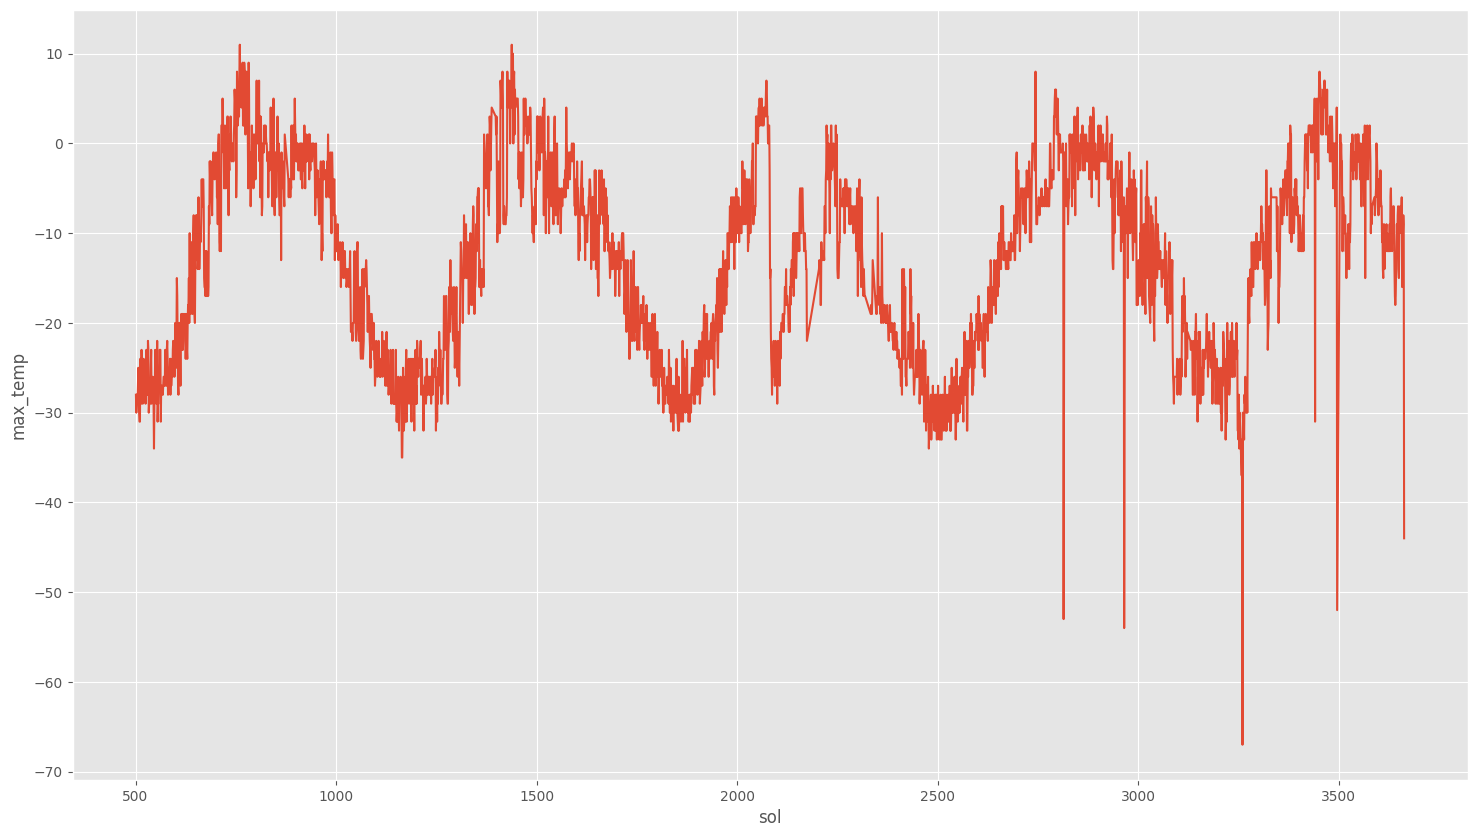

In [15]:
sns.lineplot(data=df, x='sol', y='max_temp');

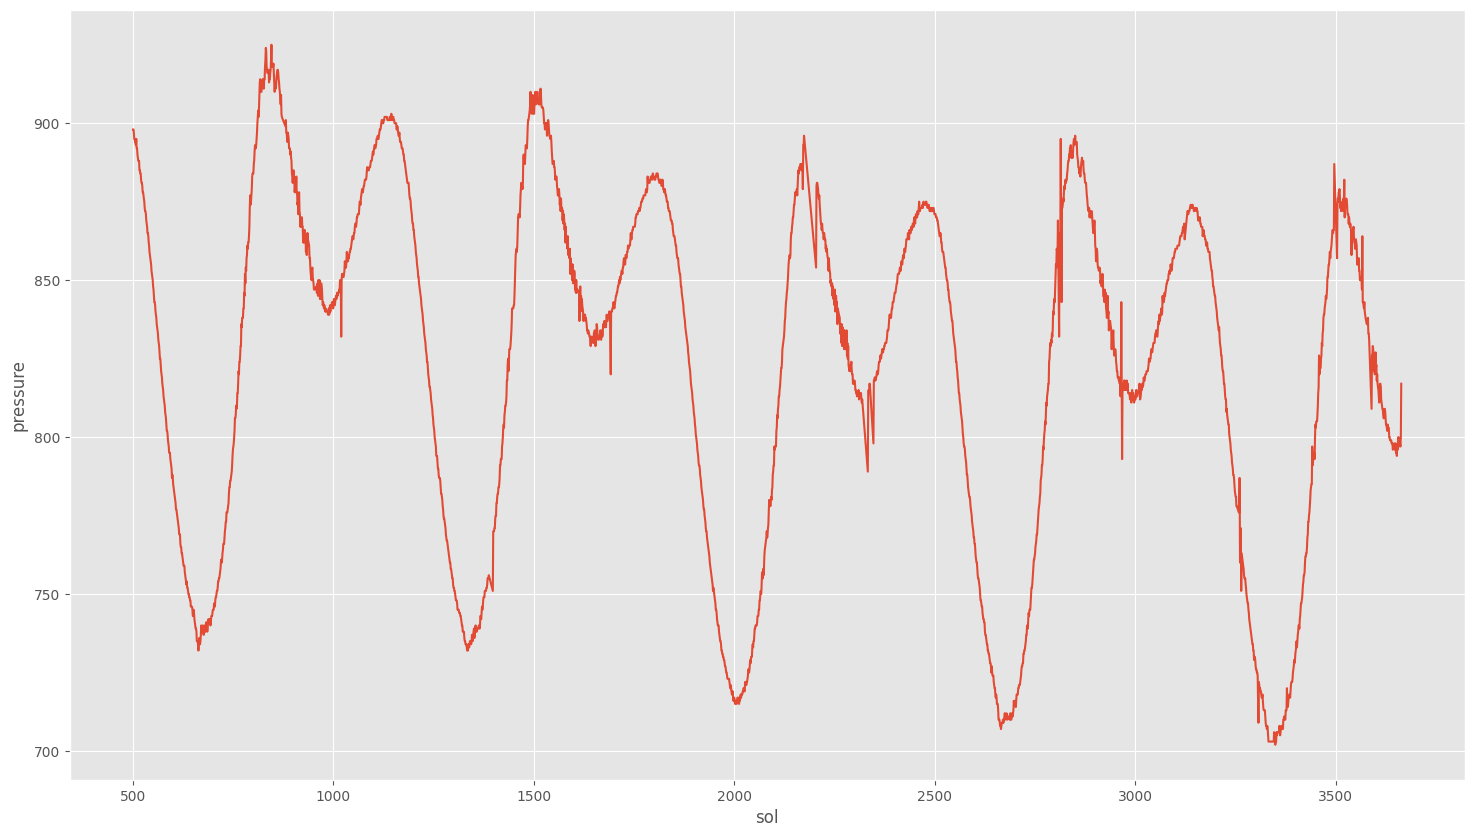

In [16]:
sns.lineplot(data=df, x='sol', y='pressure');

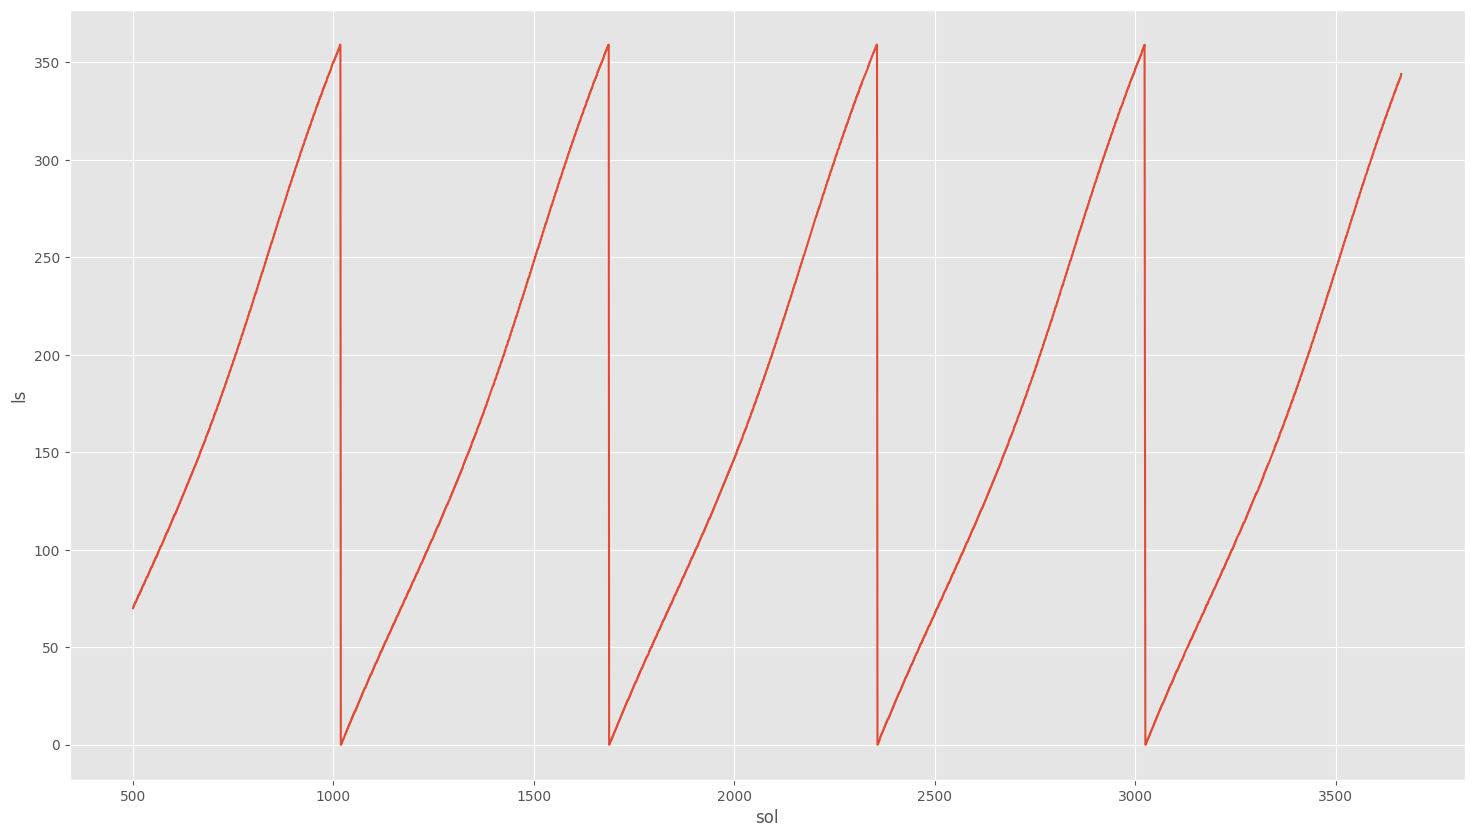

In [18]:
sns.lineplot(data=df, x='sol', y='ls');